In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import warnings
warnings.filterwarnings('ignore')

In [82]:
fiscal_dframe = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW4/Sdf16_1a.txt', sep = '\t')
rla_dframe = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW4/rla-achievement-lea-sy2015-16.csv', sep = ',')
math_dframe = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW4/math-achievement-lea-sy2015-16.csv', sep = ',')
membership_dframe = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW4/ccd_lea_052_1516_w_1a_011717.csv', sep = ',')
disability_dframe = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW4/ccd_lea_002089_1516_w_1a_011717.csv', sep = ',')

In [11]:
fiscal_dframe.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


### Problem 1
**For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of
each district’s total funding that will be lost.**

**Which districts will be affected by your budget cuts the most?**

In [14]:
print("15% of federal budget that is being spent on funding school districts is $",fiscal_dframe['TFEDREV'].sum() * .15)


15% of federal budget that is being spent on funding school districts is $ 8340410870.7


In [42]:
district_fiscal_df = fiscal_dframe[["LEAID", "STNAME", "TOTALREV", "TOTALEXP", "NAME", "V33", "TFEDREV"]]
district_fiscal_df = district_fiscal_df[district_fiscal_df['TOTALREV']>=0]
district_fiscal_df = district_fiscal_df[district_fiscal_df['TOTALEXP']>=0]

In [43]:
remaining_debt = district_fiscal_df.groupby(['LEAID', 'STNAME']).sum().reset_index()
remaining_debt['DEBT'] = remaining_debt['TOTALEXP'] - remaining_debt['TOTALREV']
remaining_debt_neg_values = remaining_debt[remaining_debt['DEBT'] < 0]
remaining_debt_neg_values.loc[:,'DEBT'] *= -1
extra_amt = remaining_debt_neg_values['DEBT'].sum()
remaining_debt_neg_values['COST_CUT'] = round(((fiscal_dframe['TFEDREV'].sum() * .15)/extra_amt)*(remaining_debt_neg_values['DEBT']))
remaining_debt_neg_values['PROPORTION'] = remaining_debt_neg_values['COST_CUT']/remaining_debt_neg_values['TOTALREV']
remaining_debt_neg_values.head()

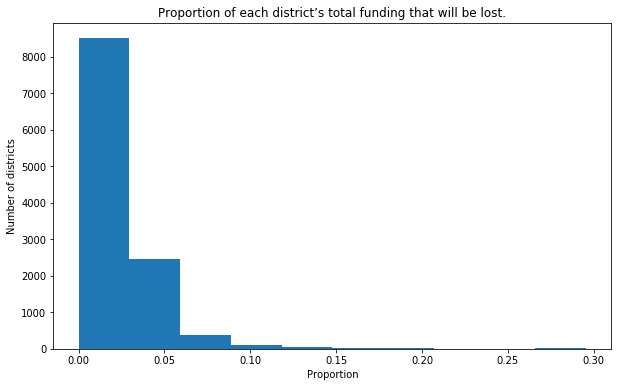

In [45]:
fig = plt.figure()
plt.hist(remaining_debt_neg_values['PROPORTION'], bins = 10)
plt.title('Proportion of each district’s total funding that will be lost.')
plt.xlabel('Proportion')
plt.ylabel('Number of districts')
fig.set_size_inches(10, 6)
plt.show()

In [91]:
revenue_cut = remaining_debt_neg_values[['LEAID', 'STNAME', 'PROPORTION']].sort_values(by = ['PROPORTION'], 
                                                                                       ascending = False)
revenue_cut.head(20)

,LEAID,STNAME,PROPORTION
4761,4800291,Texas,0.295401
4676,4800091,Texas,0.295401
183,400206,Arizona,0.295401
2349,2680995,Michigan,0.258474
2338,2680880,Michigan,0.193697
434,400920,Arizona,0.178927
2348,2680990,Michigan,0.178362
1352,2313590,Maine,0.167980
180,400197,Arizona,0.166378
1344,2313070,Maine,0.160000


These are the top 20 districts which are affected the most by the cutting funds. They lost around 30-20% of there total budget because of this. But majority of cities don't recieve budget cuts.

### Problem 2
**A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden
pre-existing biases in the data, and further disadvantage groups that are already disadvantaged.**

**Calculate the proportion of enrolled students by race for each district, then visualize the distributions of
these for districts that received budget cuts versus districts that did not receive budget cuts.**

**Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?**

In [47]:
races=['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR', 'TOTAL']
memship_data = membership_dframe[['LEAID', 'TOTAL','AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']]

In [48]:
remaining_debt_neg_values = pd.merge(remaining_debt_neg_values, memship_data)

In [49]:
remaining_debt_neg_values.head()

,LEAID,STNAME,TOTALREV,TOTALEXP,V33,TFEDREV,DEBT,COST_CUT,PROPORTION,TOTAL,AM,AS,HI,BL,WH,HP,TR
0,100005,Alabama,49795000,46778000,5214,7277000,3017000,891226.0,0.017898,5214,14,17,2289,152,2619,4,119
1,100007,Alabama,168040000,165436000,13910,6088000,2604000,769226.0,0.004578,13910,10,931,1008,3541,8131,14,275
2,100008,Alabama,105927000,101154000,10011,5007000,4773000,1409951.0,0.013311,10011,62,862,439,2042,6186,27,393
3,100012,Alabama,22813000,22413000,2310,2457000,400000,118161.0,0.005180,2310,9,15,639,28,1535,11,73
4,100030,Alabama,32454000,29642000,3102,3717000,2812000,830669.0,0.025595,3102,1,29,177,1211,1609,2,73


In [60]:
cut_cost = district_fiscal_df['TFEDREV'].sum() * .15
cut_cost_df = district_fiscal_df[['LEAID','TOTALEXP','V33', 'STNAME', 'NAME', 'TFEDREV']]
cut_cost_df = cut_cost_df[(cut_cost_df['TFEDREV'] > 0) & (cut_cost_df['V33'] > 0)]
cut_cost_df['spending'] = cut_cost_df['TFEDREV']/cut_cost_df['V33']
for i, v in cut_cost_df.sort_values('spending', ascending = False).iterrows():    
    if ((cut_cost - (v['TFEDREV'] * .20)) > 0):        
        cut_cost_df.loc[i, 'cut_cost'] = v['TFEDREV'] * .20
        cut_cost -= (v['TFEDREV'] * .20)
        cut_cost_df.loc[i, 'STNAME'] = v['STNAME']
        cut_cost_df.loc[i, 'NAME'] = v['NAME']       
    else:
        cut_cost_df.loc[i, 'cut_cost'] = 0

In [74]:
cut_cost_df.sort_values('cut_cost', ascending = False).head()

,LEAID,TOTALEXP,V33,STNAME,NAME,TFEDREV,spending,cut_cost,TOTAL,AM,AS,HI,BL,WH,HP,TR
1521,622710,9686165000,639337,California,Los Angeles Unified,1091400000,1707.080929,218280000.0,639337,1309,36082,470360,54833,64186,1969,10598
6833,4816230,1890331000,158604,Texas,DALLAS ISD,287161000,1810.553328,57432200.0,158604,526,2148,111238,35859,7843,108,882
4881,3200060,3081183000,325990,Nevada,CLARK COUNTY SCHOOL DISTRICT,277628000,851.645756,55525600.0,325990,1282,20508,148331,44540,85544,5083,20702
5825,4218990,2824311000,134044,Pennsylvania,Philadelphia City SD,271369000,2024.477037,54273800.0,134044,262,10706,25949,68866,18307,72,9882
6285,4700148,1252659000,114487,Tennessee,Shelby County,212572000,1856.734826,42514400.0,114487,101,1785,14077,87014,8666,38,2806


In [62]:
cut_cost_df = pd.merge(cut_cost_df, memship_data)

In [63]:
cut_cost_df.head()

,LEAID,TOTALEXP,V33,STNAME,NAME,TFEDREV,spending,cut_cost,TOTAL,AM,AS,HI,BL,WH,HP,TR
0,100005,46778000,5214,Alabama,Albertville City,7277000,1395.665516,1455400.0,5214,14,17,2289,152,2619,4,119
1,100006,64739000,5635,Alabama,Marshall County,7747000,1374.800355,1549400.0,5635,26,17,1160,50,4331,2,49
2,100007,165436000,13910,Alabama,Hoover City,6088000,437.670740,0.0,13910,10,931,1008,3541,8131,14,275
3,100008,101154000,10011,Alabama,Madison City,5007000,500.149835,0.0,10011,62,862,439,2042,6186,27,393
4,100011,32285000,1905,Alabama,Leeds City,1522000,798.950131,0.0,1905,2,13,241,433,1148,5,63


In [50]:
rev_cut = remaining_debt_neg_values[remaining_debt_neg_values['PROPORTION'] > 0]

rev_cut = rev_cut[races].sum()
for each_race in races[:-1]:
    rev_cut[each_race + '_'] = rev_cut[each_race] / rev_cut[races[-1]]

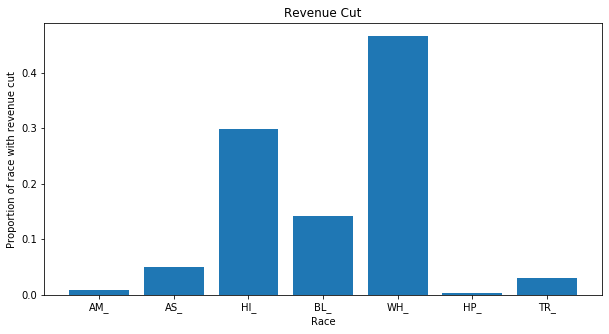

In [52]:
plt.figure(figsize=(10,5))
plt.bar(rev_cut.index[8:], rev_cut[8:])
plt.title('Revenue Cut')
plt.xlabel('Race')
plt.ylabel('Proportion of race with revenue cut')
plt.show()

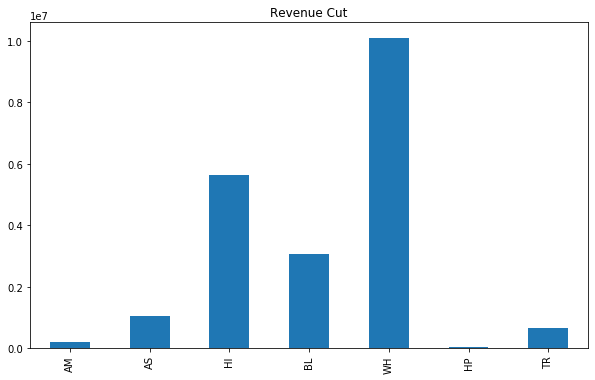

In [70]:
plt.title('Revenue Cut')
cut_cost_df[['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.bar(figsize = (10, 6))

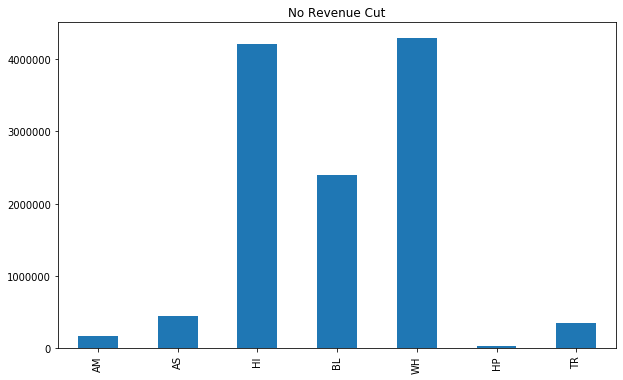

In [71]:
plt.title('No Revenue Cut')
cut_cost_df[cut_cost_df['cut_cost'] > 0][['AM', 'AS','HI', 'BL', 'WH', 'HP', 'TR']].sum().plot.bar(figsize = (10, 6))

There isn't big difference between histograms of funding cut and no funding cut except few races like white, hispanic and black. The funcding cuts are affecting the minorities greatly. Districts with a large number of people belonging to WH race would have higher chances of receiving a budget cut. This unsimilarity in distribution of proportions shows that there has been bias introduced in calculations which has resulted in these numbers.

### Problem 3
**Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each
district, then visualize the distributions of these proportions for districts that received budget cuts versus
districts that did not receive budget cuts.**

**Comment on whether the the distributions appear to be the same or different. Did your selection include any
hidden biases, or manage to avoid them?**


In [83]:
dis_status = pd.merge(cut_cost_df, disability_dframe)

In [84]:
len(dis_status.columns)

24

In [85]:
dis_status['disable_prop'] = dis_status['SPECED'] / dis_status['TOTAL']
dis_status['speced_disabled'] = dis_status['SPECED']
dis_status['speced_not_disabled'] = dis_status['TOTAL'] - dis_status['SPECED']
dis_status.head()

,LEAID,TOTALEXP,V33,STNAME,NAME,TFEDREV,spending,cut_cost,TOTAL,AM,...,FIPST,STABR,STATENAME,SEANAME,ST_LEAID,LEA_NAME,SPECED,disable_prop,speced_disabled,speced_not_disabled
0,100005,46778000,5214,Alabama,Albertville City,7277000,1395.665516,1455400.0,5214,14,...,1,AL,ALABAMA,Alabama Department Of Education,101,Albertville City,267,0.051208,267,4947
1,100006,64739000,5635,Alabama,Marshall County,7747000,1374.800355,1549400.0,5635,26,...,1,AL,ALABAMA,Alabama Department Of Education,048,Marshall County,430,0.076309,430,5205
2,100007,165436000,13910,Alabama,Hoover City,6088000,437.670740,0.0,13910,10,...,1,AL,ALABAMA,Alabama Department Of Education,158,Hoover City,861,0.061898,861,13049
3,100008,101154000,10011,Alabama,Madison City,5007000,500.149835,0.0,10011,62,...,1,AL,ALABAMA,Alabama Department Of Education,169,Madison City,735,0.073419,735,9276
4,100011,32285000,1905,Alabama,Leeds City,1522000,798.950131,0.0,1905,2,...,1,AL,ALABAMA,Alabama Department Of Education,167,Leeds City,171,0.089764,171,1734


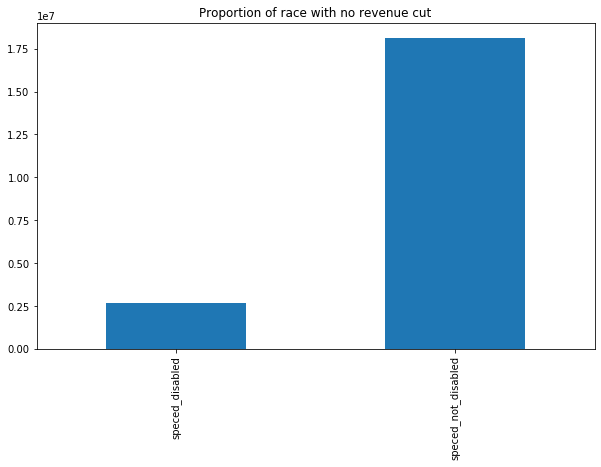

In [87]:
plt.title("Proportion of race with no revenue cut")
dis_status[['speced_disabled', 'speced_not_disabled']].sum().plot.bar(figsize = (10, 6))

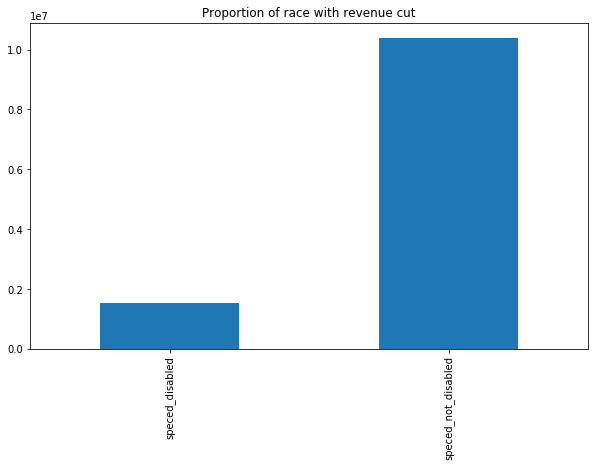

In [88]:
plt.title("Proportion of race with revenue cut")
dis_status[dis_status['cut_cost'] > 0][['speced_disabled', 'speced_not_disabled']].sum().plot.bar(figsize = (10, 6))


The distributions are same for districts that received funding cuts and for districts that did not receive funding cuts. The disability factor didn't make any difference in cutting the funds. Also, the distribution proportion shows that  there is no bias introduced.

### Problem 4
**Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4
and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of
their approach.**

https://github.com/chao-h/ds5500hw3

I choose to critique Hsiangwei Chao's strategy for cutting funds. He is calculating the profit of the schools, and whichever vallue is higher than the 15% of the U.S. federal budget in funding school districts is considered to have positive budgets. He suggest that, we only cut funds for the schools that already have positive budgets, since these school will have little impact on its financial stability. This is justified because some school districts might earn less and some might earn more. Deduction of equal amount of budget would be unfair to school districts with lower revenue. I have used similar strategy for cutting funds to school districts. One disadvantage of this method is, in a scenario, where a big district goes into debt, they wont have enough funds to recover as it has been already cut, whereas smaller districts might still recover. Also, only minority features were taken into consideration. It can introduce bias.

### Problem 5
**Summarize and comment on what you learned from one the special topics lectures (MapReduce + Hadoop,
Visualization, Causal Inference, or the Industry Panel) of your choice.**

I would like to comment on Visualization Lecture by Steven Braun.

Visualization is a very important skill set for a data scientist. The lecture covered many visualization tools, techniques and ways to make a good visualization. It is very important to create an impactful visualization as it helps us in understanding the data and problem better than a casual inference. The lecture also focused on static and interactive plots. 

Ofcourse I believe that every lecture was informative.